## Main imports

In [1]:
from dt.model import Model as DTModel
from dt.model import Object
from adaboost.model import BoostModel
import adaboost.model
import csvparser
import numpy as np
import math

**Read datasets**

In [2]:
class_dict = {
    'N': -1,
    'P': 1
}


geyser_df = csvparser.read_file('geyser.csv')
geyser_ds = [Object(o[:-1], class_dict[o[-1]]) for o in geyser_df.values]

chips_df = csvparser.read_file('chips.csv')
chips_ds = [Object(o[:-1], class_dict[o[-1]]) for o in chips_df.values]

In [3]:
import matplotlib.pyplot as plt
net_size = 40

def draw(classify, data, miny=-2, maxy=2, minx=-2, maxx=2):
	for x in np.linspace(minx, maxx, net_size):
		for y in np.linspace(miny, maxy, net_size):
			clazz = classify(Object([x, y], 0))
			if clazz == -1:
				c = '#5ca532'
			elif clazz == 1:
				c = '#db587b'
			else:
				c = '#fffacd'
			plt.scatter(x, y, c=c, s=20)

	for x in data:
		if x.clazz == -1:
			c = 'Green'
		else:
			c = 'Red'
		plt.scatter(x.features[0], x.features[1], c=c, s=100)

	plt.legend()

	plt.show()


def draw_data(data):
	for x in data:
		if x[2] == 'N':
			c = 'Green'
		else:
			c = 'Red'
		plt.scatter(x[0], x[1], c=c, s=100)



	plt.legend()

	plt.show()

In [5]:
def acc(model, objects):
    score = 0
    for object in objects:
        actual = model.predict(object)
        if object.clazz == actual:
            score += 1
    return score / len(objects)

## Running model on geyser dataset

In [6]:
geyser_model = BoostModel(geyser_ds, 500, 3)
geyser_weighted_models = geyser_model.run()

In [7]:
acc(geyser_model, geyser_ds)

0.9369369369369369

No handles with labels found to put in legend.


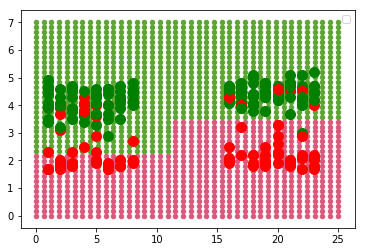

No handles with labels found to put in legend.


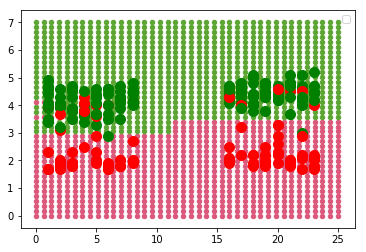

No handles with labels found to put in legend.


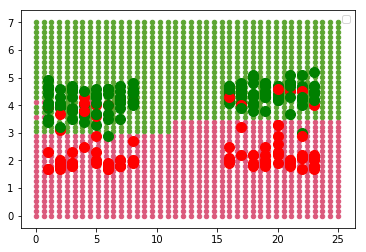

No handles with labels found to put in legend.


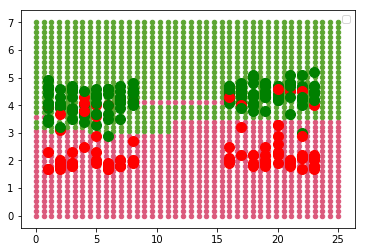

No handles with labels found to put in legend.


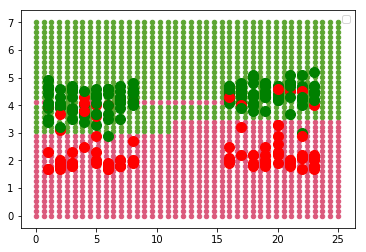

No handles with labels found to put in legend.


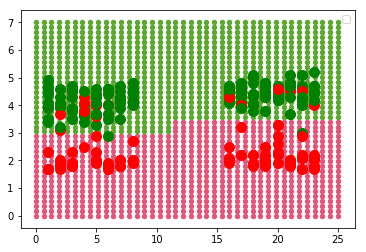

No handles with labels found to put in legend.


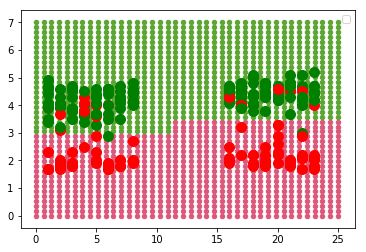

No handles with labels found to put in legend.


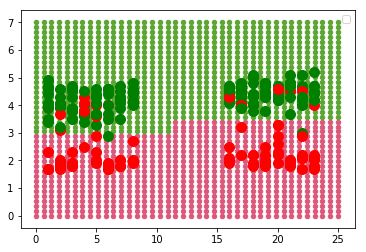

No handles with labels found to put in legend.


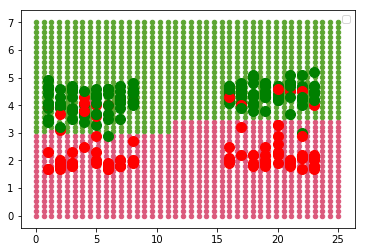

In [12]:
for i in range(1, 10):    
    draw(lambda obj: adaboost.model.predict(obj, geyser_weighted_models[:i * 3]), geyser_ds, \
         miny=0, minx=0, maxy=7, maxx=25)

## Running model on chips dataset

In [6]:
len(chips_ds)

118

In [8]:
np.random.shuffle(chips_ds)

train_set = chips_ds[:80]
test_set = chips_ds[80:]

chips_model = BoostModel(train_set, 500, 3)
chipds_weighted_models = chips_model.run()

In [9]:
train_accs = []
test_accs = []
iter_range = range(10, 500, 5)
for iterations in iter_range:
    model = BoostModel(train_set, iterations, 3)
    model.run()
    train_accs.append(acc(model, train_set))
    test_accs.append(acc(model, test_set))

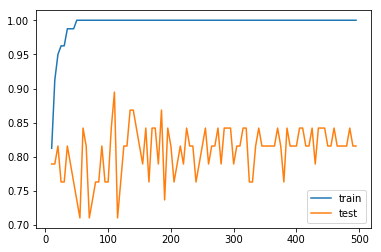

In [12]:
plt.plot(iter_range, train_accs, label='train')
plt.plot(iter_range, test_accs, label='test')
plt.legend()
plt.show()

In [27]:
acc(chips_model, test_set)

0.7368421052631579

In [28]:
acc(chips_model, train_set)

1.0

No handles with labels found to put in legend.


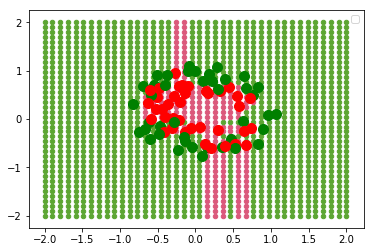

In [30]:
draw(lambda obj: chips_model.predict(obj), train_set)

No handles with labels found to put in legend.


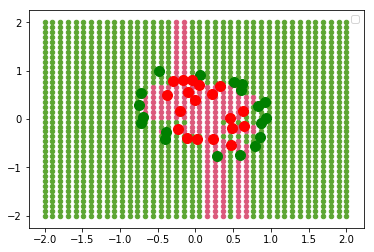

In [32]:
draw(lambda obj: chips_model.predict(obj), test_set)